## Python implementation of computation graphs

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# NODE class instances will only be created via the Delayed class
class Node:
    def __init__(self, func, label, id):
        self.func=func      #instance of the function this node represents
        self.id=id
        self.label=label
        self.children= []
        self.parents=[]
        
    # TODO
    def FUNC_TO_VISUALISE_THE_GRAPH():
        pass

class Variable:
    def __init__(self, val, typ, shape):
        self.array=(np.array(val, dtype=typ)).reshape(shape)
        
class Delayed:
    def __init__(self, func, *args, **kwargs):
        ''' 
        when the delayed fucntion is called it means that an operation is called, and we need to wrap it in an object such that
        the operation is computed at a later time as suited. The following should be noted:
        1) the argments of the actual function are recieved by *args and **kwargs
        2) the arguments recieved can be a operation node or a value(Variable)
        3) the delayed object will initialise a graph node and its children
        '''
        self.func=func
        self.args=args
        self.kwargs=kwargs
        self.graph_node=Node(func, self.func.__name__,id(self))     #initialising the node for the operation
        for arg in args:
            self.graph_node.children.append(arg)
        
        
    def compute():
        
    def auto_diff():
        
    
def delayed(func):
    def wrapper(*args,**kwargs):
        return Delayed(func, *args, **kwargs)
    return wrapper

@delayed
def inc(x):
    return x+1

a=inc(2)
''' 
The above is computed in the following steps
1) delayed(inc) is called which returns a wrapper object
2) wrapper(2) is called, '2' and other args(if there) are passed to *args and **kwargs
3) the wrapper function returns a Delayed object which is stored in 'a'
4) now when a.compute() or a.auto_diff() is called, it resolves all dependencies recursively to return a value which is the result of the computation
'''

        

In [37]:
class Node:
    def __init__(self, id, label):
      self.id = id
      self.label = label
      self.children = []
      self.parents= []

    def to_nx_graph(self, nx_graph=None):
      """To networkx graph for visualization"""
      if nx_graph is None:
        nx_graph = nx.DiGraph()  # Create a new graph if none is provided
      nx_graph.add_node(self.id, label=self.label)
      for child in self.children:
        if isinstance(child, Node):
          nx_graph.add_edge(child.id, self.id)
          child.to_nx_graph(nx_graph)
        else:
          nx_graph.add_node(child, label=child)
          nx_graph.add_edge(child, self.id)
      return nx_graph
    
class Var(Node):
  def __init__(self, val):
    super().__init__(f"Var ({id(self)})", "Var")
    self.val=val
    
class Delayed:
    def __init__(self, func, *args, **kwargs):
        self.func = func
        self.args = args
        self.kwargs = kwargs
        self.computed = False
        self.result = None
        self.graph_node = Node(f"{self.func.__name__} ({id(self)})", self.func.__name__)
        for arg in self.args:
          if isinstance(arg, Delayed):
            self.graph_node.children.append(arg.graph_node)
            #
            arg.graph_node.parents.append(self.graph_node)
          else:
            self.graph_node.children.append(arg)
            #
            arg.parents.append(self.graph_node)

    def compute(self):
        resolved_args = []
        for arg in self.args:
            if isinstance(arg, Delayed):
                resolved_args.append(arg.compute())
            else:
                resolved_args.append(arg)

        if not self.computed:
            self.result = self.func(*resolved_args, **self.kwargs)
            self.computed = True
        return self.result


def delayed(func):
    def wrapper(*args, **kwargs):
        return Delayed(func, *args, **kwargs)
    return wrapper

@delayed
def buffer(x):
  return x

@delayed
def inc(x):
    return x + 1

@delayed
def add(x, y):
    return x + y

@delayed
def sub(x,y):
  return x-y

@delayed
def mul(x, y):
    return x * y
  
@delayed
def log(x):
  return np.log(x)

@delayed
def sin(x):
  return np.sin(x)

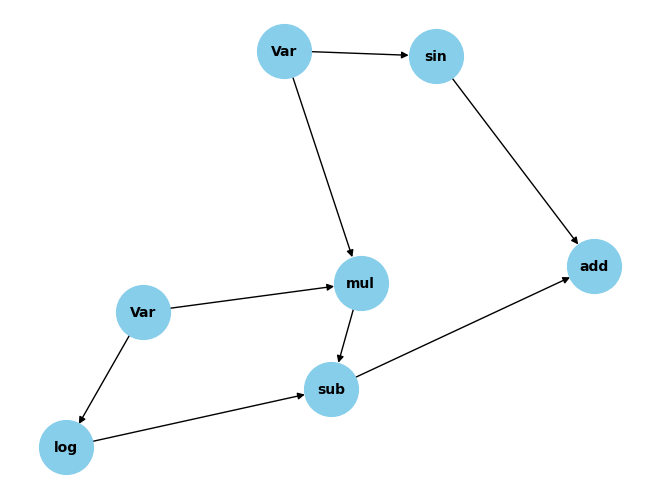

TypeError: loop of ufunc does not support argument 0 of type Var which has no callable log method

In [38]:
vm1= Var(2)
v0= Var(5)
v1 = mul(vm1, v0)
v2 = log(vm1)
v3 = sin(v0)
v4 = sub(v2,v1)
v5 = add(v4,v3)

# Visualize the graph
nx_graph = v5.graph_node.to_nx_graph()
pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos, with_labels=True,
    labels=nx.get_node_attributes(nx_graph, 'label'),
    node_size=1500, node_color="skyblue", font_size=10, font_weight='bold')
plt.show()

# Get the graph after computation
result = v5.compute()
print(result)

In [36]:
class A:
    def __init__(self):
        print(id(self))
A()

1884970958176
